# Anomaly Detection among Dropouts

---

In this part of the notebook, we investigate the profile of dropouts via anomaly detection

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

studentData = pd.read_csv('dataset.csv')
studentData.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
studentData.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [3]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
studentData.isnull().sum()
# no null values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
studentData.duplicated()
# no duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

In [6]:
# rename Nactionality to Nationality
studentData.rename({"Nacionality" : "Nationality"}, inplace=True, axis=1)
studentData.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

---
### EDA

In [7]:
df = studentData.copy()
df.sample(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4412,1,14,1,5,1,1,1,13,14,8,...,2,6,7,5,12.2,0,13.9,-0.3,0.79,Enrolled
3426,1,9,1,9,1,1,1,23,28,6,...,0,5,11,2,11.0,0,10.8,1.4,1.74,Enrolled
463,1,12,1,9,1,12,1,3,1,4,...,0,5,6,5,12.2,0,12.4,0.5,1.79,Graduate


Define some helper functions below:

In [118]:
# convert_numeric_to_cat - big big function that converts the categorical numbers to descriptions provided by data source
def convert_numeric_to_cat(col_name):
    # Demographic
    if col_name == "Marital status":
        return {1:"Single",2:"Married",3:"Widower",4:"Divorced",5:"Facto union",6:"Legally separated",}
    elif col_name == "Nationality":
        return{1:"Portuguese",2:"German",3:"Spanish",4:"Italian",5:"Dutch",6:"English",7:"Lithuanian",8:"Angolan",9:"Cape Verdean",10:"Guinean",11:"Mozambican",12:"Santomean",13:"Turkish",14:"Brazilian",15:"Romanian",16:"Moldova (Republic of)",17:"Mexican",18:"Ukrainian",19:"Russian",20:"Cuban",21:"Colombian",}
    # Socioeconomics 
    elif col_name == "Mother's qualification" or col_name == "Father's qualification":
        return {1:"Secondary Education-12th Year of Schooling or Equivalent",2:"Higher Education-bachelor’s degree",3:"Higher Education-degree",4:"Higher Education-master’s degree",5:"Higher Education-doctorate",6:"Frequency of Higher Education",7:"12th Year of Schooling-not completed",8:"11th Year of Schooling-not completed",9:"7th Year (Old)",10:"Other-11th Year of Schooling",11:"2nd year complementary high school course",12:"10th Year of Schooling",13:"General commerce course",14:"Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",15:"Complementary High School Course",16:"Technical-professional course",17:"Complementary High School Course-not concluded",18:"7th year of schooling",19:"2nd cycle of the general high school course",20:"9th Year of Schooling-not completed",21:"8th year of schooling",22:"General Course of Administration and Commerce",23:"Supplementary Accounting and Administration",24:"Unknown",25:"Cannot read or write",26:"Can read without having a 4th year of schooling",27:"Basic education 1st cycle (4th/5th year) or equivalent",28:"Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent",29:"Technological specialization course",30:"Higher education-degree (1st cycle)",31:"Specialized higher studies course",32:"Professional higher technical course",33:"Higher Education-master’s degree (2nd cycle)",34:"Higher Education-doctorate (3rd cycle)}",}
    elif col_name == "Mother's occupation" or  col_name == "Father's occupation":
        return {1:"Student",2:"Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",3:"Specialists in Intellectual and Scientific Activities",4:"Intermediate Level Technicians and Professions",5:"Administrative staff",6:"Personal Services, Security and Safety Workers, and Sellers",7:"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",8:"Skilled Workers in Industry, Construction, and Craftsmen",9:"Installation and Machine Operators and Assembly Workers",10:"Unskilled Workers",11:"Armed Forces Professions",12:"Other Situation", 13:"(blank)",14:"Armed Forces Officers",15:"Armed Forces Sergeants",16:"Other Armed Forces personnel",17:"Directors of administrative and commercial services",18:"Hotel, catering, trade, and other services directors",19:"Specialists in the physical sciences, mathematics, engineering, and related techniques",20:"Health professionals",21:"Teachers",22:"Specialists in finance, accounting, administrative organization, and public and commercial relations",23:"Intermediate level science and engineering technicians and professions",24:"Technicians and professionals of intermediate level of health",25:"Intermediate level technicians from legal, social, sports, cultural, and similar services",26:"Information and communication technology technicians",27:"Office workers, secretaries in general, and data processing operators",28:"Data, accounting, statistical, financial services, and registry-related operators",29:"Other administrative support staff",30:"Personal service workers",31:"Sellers",32:"Personal care workers and the like",33:"Protection and security services personnel",34:"Market-oriented farmers and skilled agricultural and animal production workers",35:"Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",36:"Skilled construction workers and the like, except electricians",37:"Skilled workers in metallurgy, metalworking, and similar",38:"Skilled workers in electricity and electronics",39:"Workers in food processing, woodworking, and clothing and other industries and crafts",40:"Fixed plant and machine operators",41:"Assembly workers",42:"Vehicle drivers and mobile equipment operators",43:"Unskilled workers in agriculture, animal production, and fisheries and forestry",44:"Unskilled workers in extractive industry, construction, manufacturing, and transport",45:"Meal preparation assistants",46:"Street vendors (except food) and street service providers",}
    # Academic data
    elif col_name == "Application mode":
        return {1:"1st phase-general contingent",2:"Ordinance No. 612/93",3:"1st phase-special contingent (Azores Island)",4:"Holders of other higher courses",5:"Ordinance No. 854-B/99",6:"International student (bachelor)",7:"1st phase-special contingent (Madeira Island)",8:"2nd phase-general contingent",9:"3rd phase-general contingent",10:"Ordinance No. 533-A/99, item b2) (Different Plan)",11:"Ordinance No. 533-A/99, item b3 (Other Institution)",12:"Over 23 years old",13:"Transfer",14:"Change in course",15:"Technological specialization diploma holders",16:"Change in institution/course",17:"Short cycle diploma holders",18:"Change in institution/course (International)",}
    elif col_name == "Course":
        return {1:"Biofuel Production Technologies",2:"Animation and Multimedia Design",3:"Social Service (evening attendance)",4:"Agronomy",5:"Communication Design",6:"Veterinary Nursing",7:"Informatics Engineering",8:"Equiniculture",9:"Management",10:"Social Service",11:"Tourism",12:"Nursing",13:"Oral Hygiene",14:"Advertising and Marketing Management",15:"Journalism and Communication",16:"Basic Education",17:"Management (evening attendance)",}
    elif col_name == "Previous qualification":
        return {1:"Secondary education",2:"Higher education-bachelor’s degree",3:"Higher education-degree",4:"Higher education-master’s degree",5:"Higher education-doctorate",6:"Frequency of higher education",7:"12th year of schooling-not completed",8:"11th year of schooling-not completed",9:"Other-11th year of schooling",10:"10th year of schooling",11:"10th year of schooling-not completed",12:"Basic education 3rd cycle (9th/10th/11th year) or equivalent",13:"Basic education 2nd cycle (6th/7th/8th year) or equivalent",14:"Technological specialization course",15:"Higher education-degree (1st cycle)",16:"Professional higher technical course",17:"Higher education-master’s degree (2nd cycle)"}
    # Other binary values that might not be clear
    elif col_name == "Gender":
        return {0:"Female",1:"Male"}
    elif col_name == "Daytime/evening attendance":
        return {0:"Evening",1:"Daytime"}
    else: 
        print("Assuming it is 1/0 binary value.")
        return {0:"No",1:"Yes"}

In [130]:
def do_stacked_plot_cat(colname,top=10, convert=True):
    df_group = df.groupby([colname, "Target"]).size().reset_index().pivot(columns='Target', index=colname, values=0).copy()
    if convert:
        df_group.rename(index=convert_numeric_to_cat(col_name=colname), inplace=True)
    df_group_total = df_group.sum(axis=1)
    df_group_sorted = df_group_total.sort_values(ascending=True)
    df_group_top = df_group_sorted[(len(df_group_sorted) - top):]
    df_group.loc[df_group_top.index].plot(kind='barh', stacked=True)
    plt.ylabel(colname)
    plt.show()

In [216]:
def do_stacked_plot_numeric(colname):
    df_group = df.groupby([colname, "Target"]).size().reset_index().pivot(columns='Target', index=colname, values=0)
    df_group.plot(kind='bar', stacked=True)
    plt.xlabel(colname)
    plt.show()

In [204]:
def do_numeric_plot_compare(data1, data2, col):
    f, axes = plt.subplots(2, 2, figsize=(18, 8))
    sb.violinplot(x=col, data = data1, orient = "h", ax = axes[0,0])
    sb.histplot(x=col, data = data1, ax = axes[0,1], kde=True)
    sb.violinplot(x=col,data = data2, orient = "h", ax = axes[1,0])
    sb.histplot(x=col,data = data2, ax = axes[1,1], kde=True)

---
### Response Variable

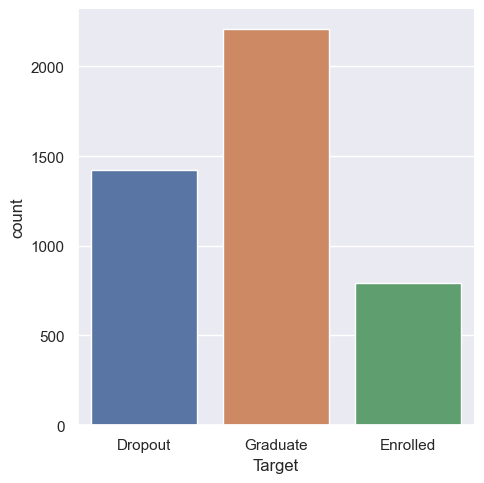

In [12]:
sb.catplot(x="Target", data=df, kind="count")

Graduates are majority, need to even out before we do classification

---
### Heatmap to correlate all variables

<AxesSubplot: >

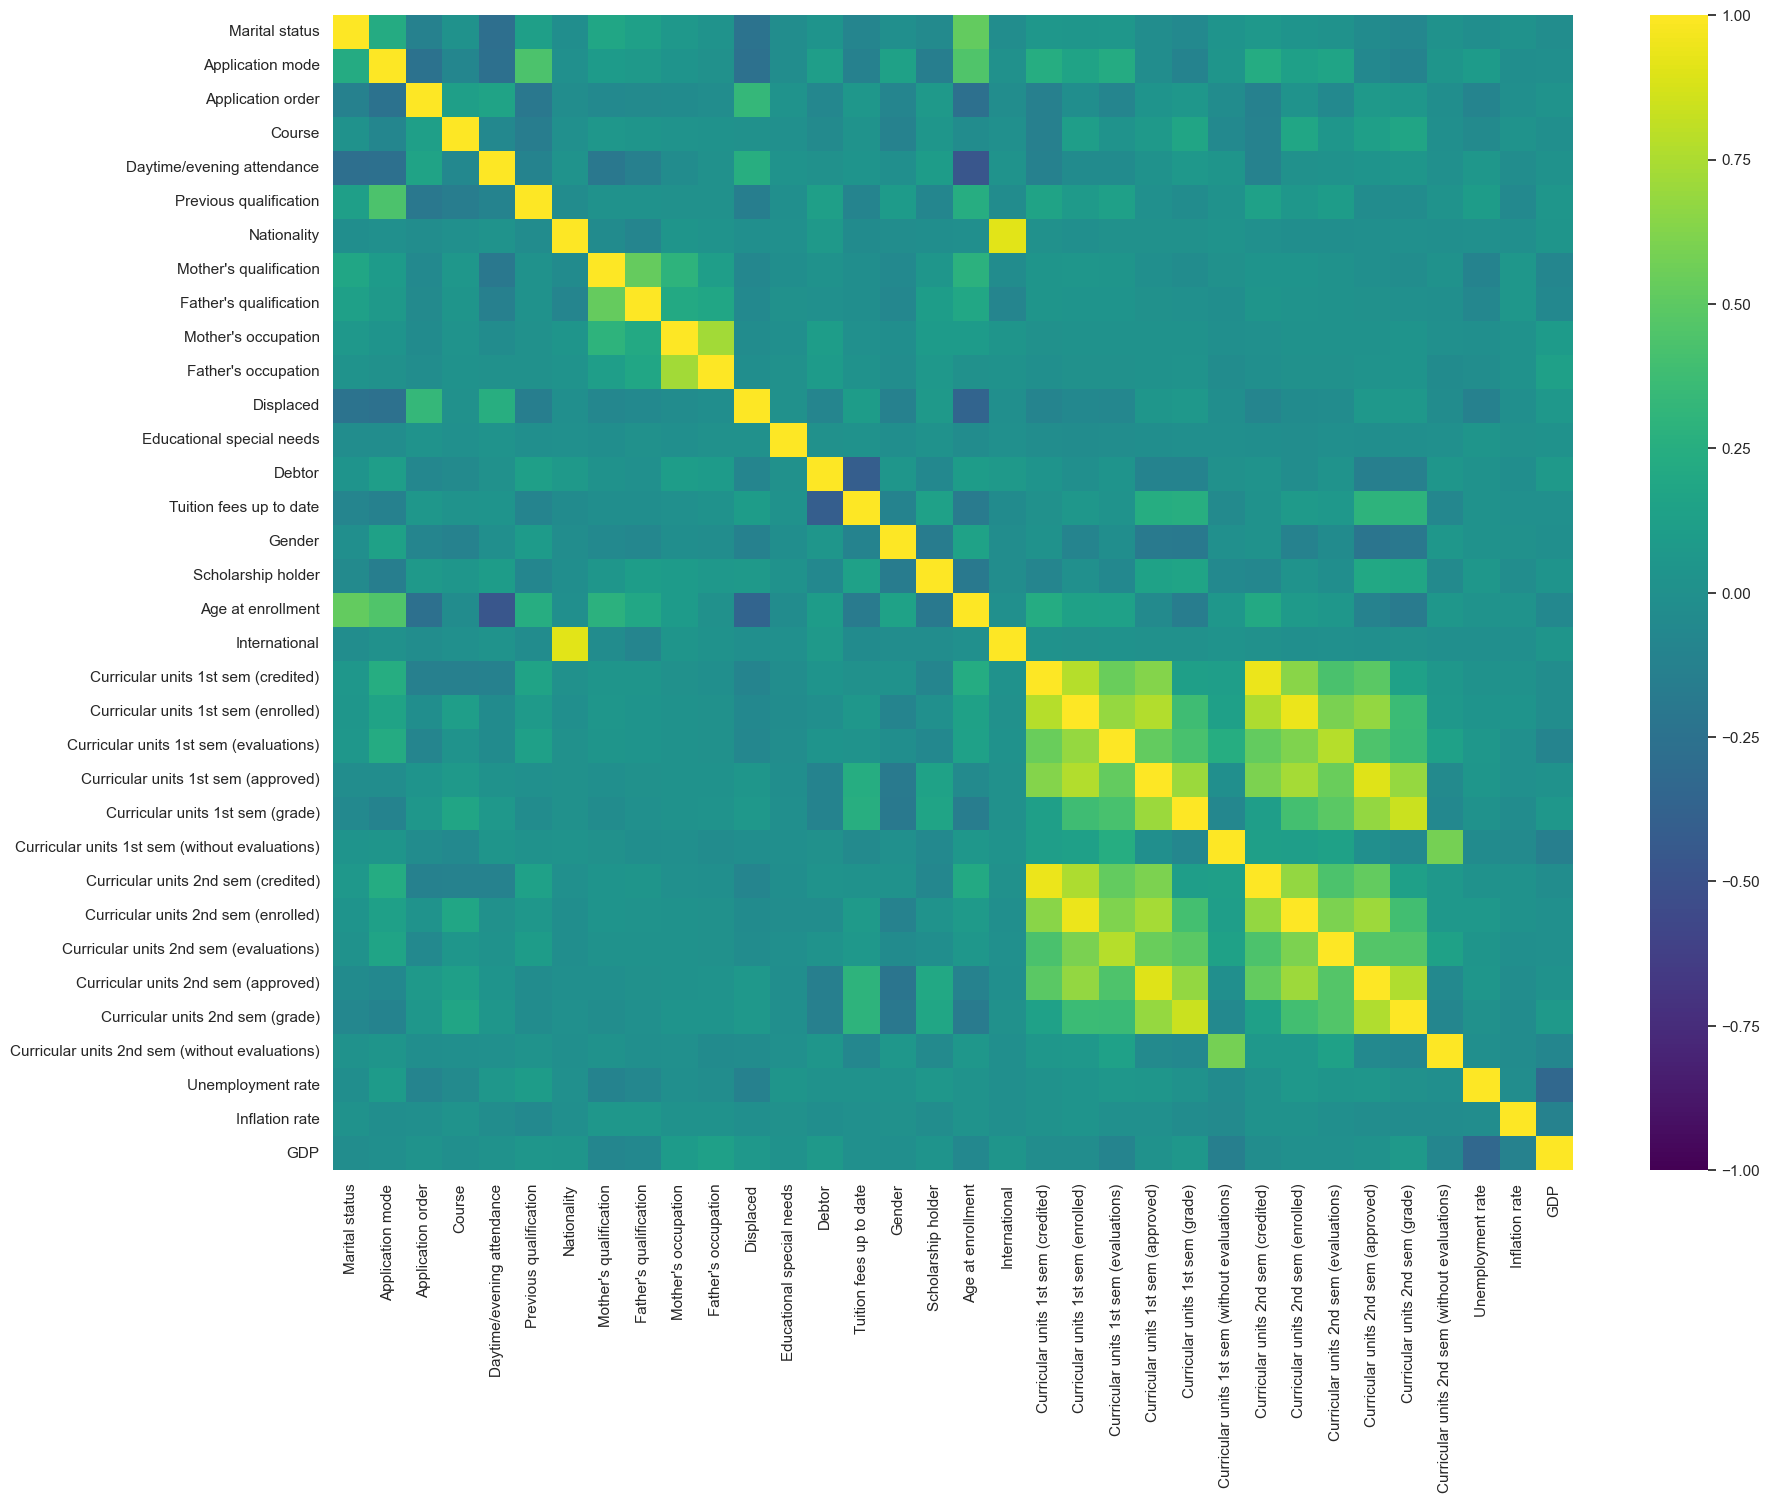

In [13]:
plt.figure(figsize=(20,15))
sb.heatmap(df.corr(numeric_only=True), vmin=-1,vmax=1,annot=False, cmap="viridis")

Strong correlation bewtween Nationality and International.\
Moderate correlation bewtween Father's qualification with Father's occupation, and similarly for Mother's.\
Moderately strong correlation between all sem 1 Curricular units with each other, and similarly for sem 2.

In [14]:
df[["International", "Nationality"]].corr()

,International,Nationality
International,1.000000,0.911724
Nationality,0.911724,1.000000


Hence with exception of International and Nationality, dataset is good for anomaly detection.

---

### Explore demographic

dict_values(['Female', 'Male'])

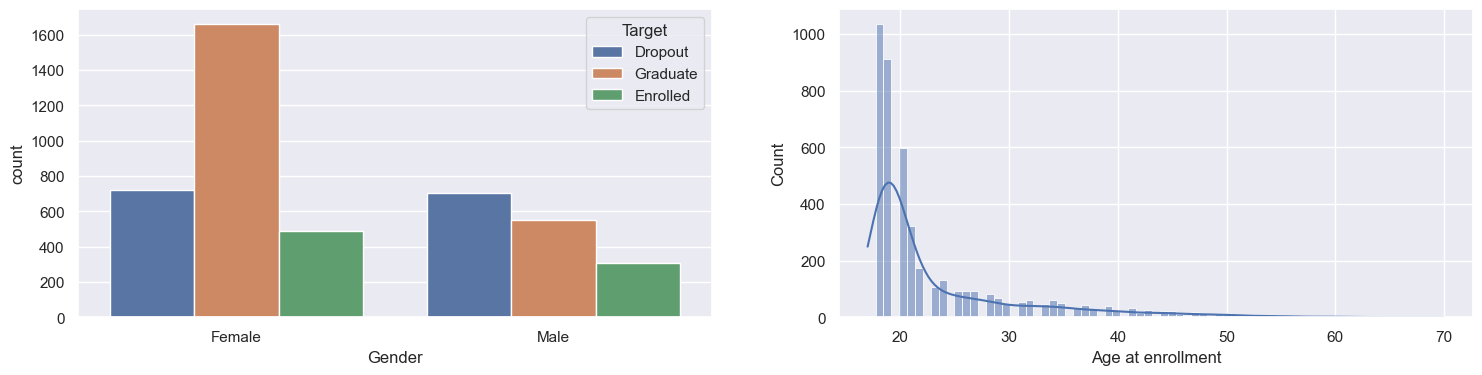

In [120]:
f,axes = plt.subplots(nrows=1,ncols=2, figsize=(18, 4))
sb.countplot(x="Gender", data=df, ax=axes[0], hue="Target").set_xticks(ticks=[0,1], labels=convert_numeric_to_cat("Gender").values())
sb.histplot(data=df["Age at enrollment"], ax=axes[1], kde= True)
convert_numeric_to_cat("Gender").values()

A lot more females graduates, meaning proprotion of female dropouts are lesser than male.\
Age positively skewed, most students are young.

Mainly Portuguese


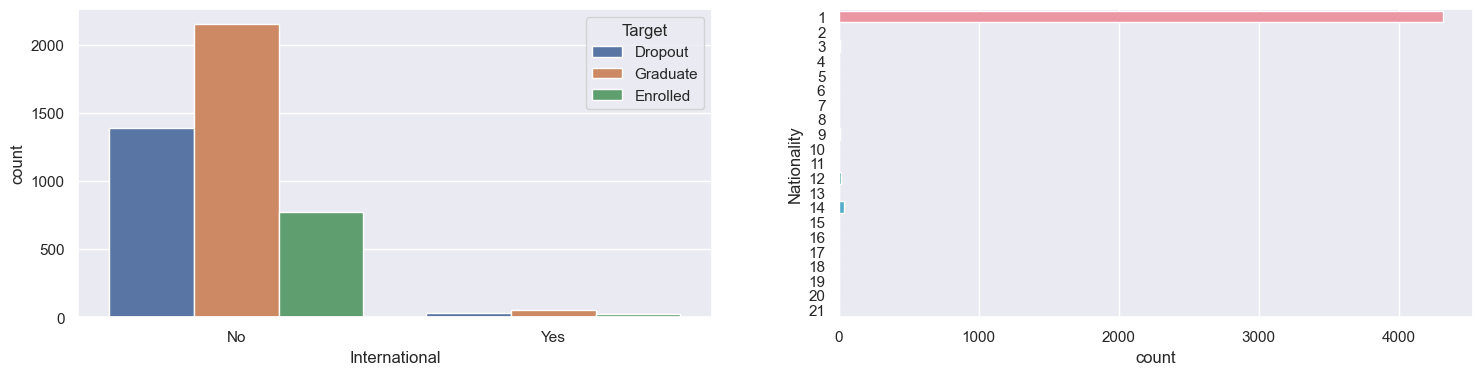

In [110]:
f,axes = plt.subplots(nrows=1,ncols=2, figsize=(18, 4))
sb.countplot(x="International", data=df, ax=axes[0], hue="Target").set_xticks(ticks=[0,1], labels=['No','Yes'])
sb.countplot(y="Nationality", data=df, ax=axes[1])
idx = df["Nationality"].value_counts().sort_values(ascending=False).index[0]
print("Mainly", convert_numeric_to_cat("Nationality")[idx])


Few international students, mostly local protugese students.

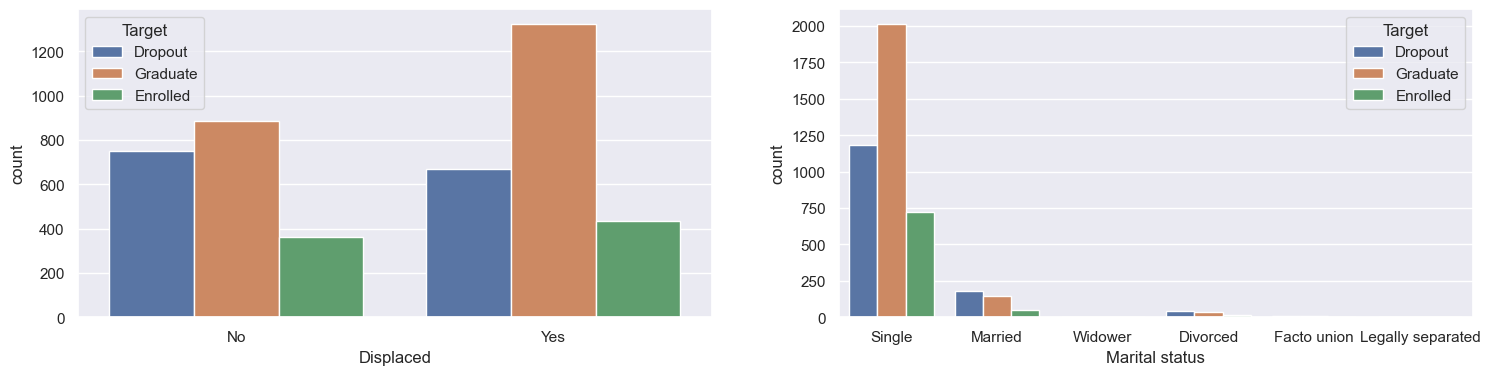

In [113]:
f,axes = plt.subplots(nrows=1,ncols=2, figsize=(18, 4))
sb.countplot(x="Displaced", data=df, ax=axes[0], hue="Target").set_xticks(ticks=[0,1], labels=['No','Yes'])
sb.countplot(x="Marital status", data=df, ax=axes[1], hue="Target").set_xticks(ticks=[0,1,2,3,4,5], labels=convert_numeric_to_cat("Marital status").values())

Majority of students were displaced (from their homes).\
Proportion of dropouts less in displaced students.\
Most were single, but those that were married were more likely to dropout.\
Possible to use `Marital status` to check if married for accessing academic success.

---
### Explore Socioeconomic

In [127]:
# doesnt tell us much because its encoded, so make a copy and replace first before describing
df_socioeco = df[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]].copy()
for col in df_socioeco:
    df_socioeco[col].replace(convert_numeric_to_cat(col), inplace=True)
df_socioeco.describe()

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation
count,4424,4424,4424,4424
unique,29,34,32,46
top,Secondary Education-12th Year of Schooling or ...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers
freq,1069,1209,1577,1010


Suprising that the occupation is unskilled worker.\
This proves that the database is not indicative of global population

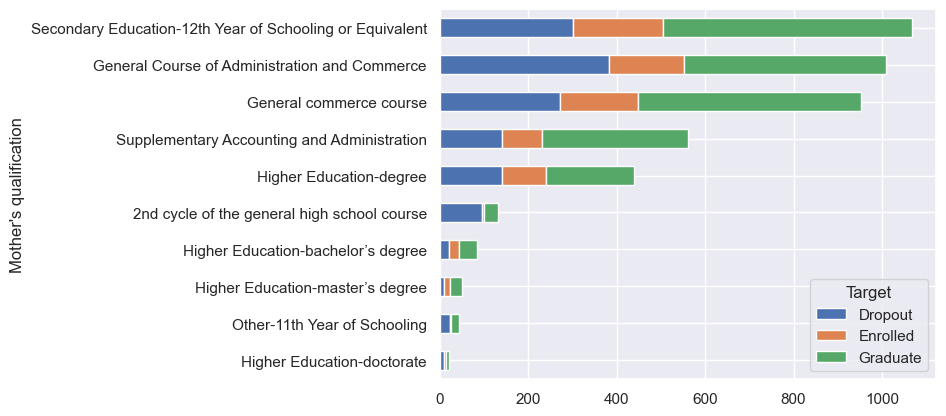

In [132]:
do_stacked_plot_cat("Mother's qualification")

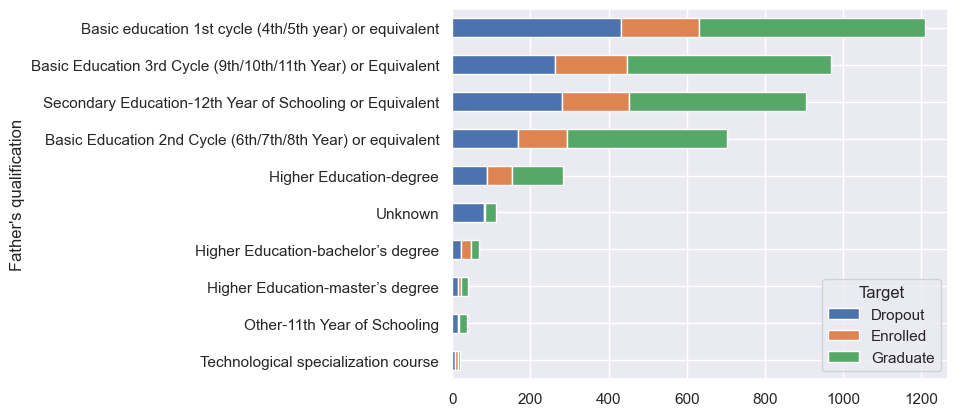

In [133]:
do_stacked_plot_cat("Father's qualification")

In general, qualification has little effect on the proportion of graduate or dropout.\
However more commonly attainable qualifications are obviously more abundant, resulting in a higher frequency for all targets.\

Notably Mother's qualifications have higher frequency of Higher Education Degree, which matches up with the current student's gender distribution.

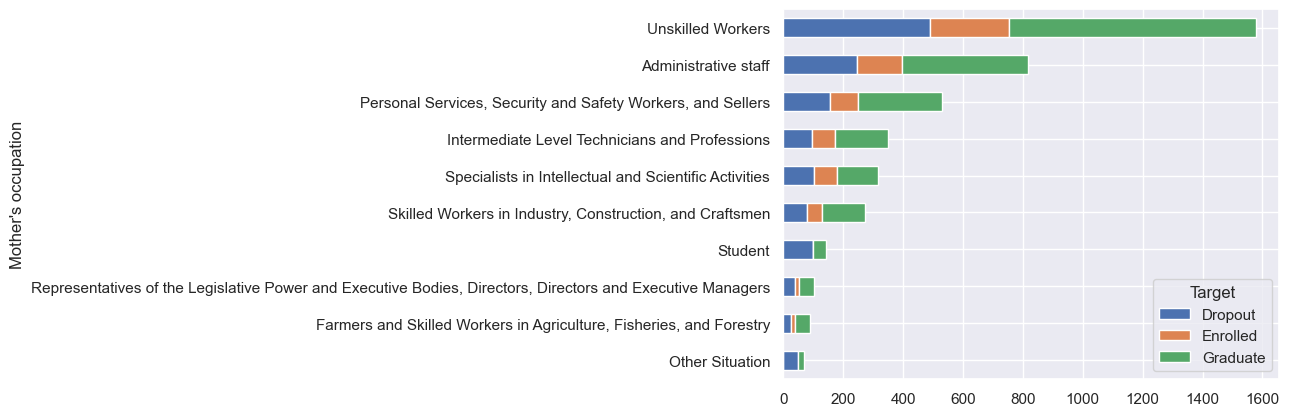

In [134]:
do_stacked_plot_cat("Mother's occupation")

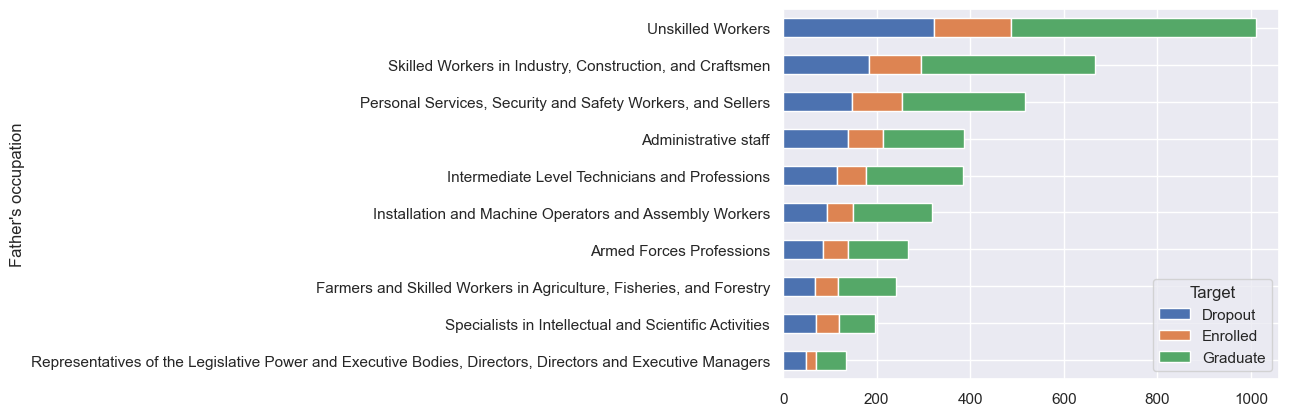

In [135]:
do_stacked_plot_cat("Father's occupation")

In [138]:
df[["Father's occupation", "Mother's occupation"]].corr()

,Father's occupation,Mother's occupation
Father's occupation,1.000000,0.724007
Mother's occupation,0.724007,1.000000


High correlation between father's and mother's occupation

Proportion of Graduates is generally higher in more common occupations.\
Notably, for mother's occupation, Student results in a high drop out proportion.

# `TODO, maybe can explore proprotions in more detail?`

---
### Explore macroeconomic

In [207]:
# only include dropout and graduated separately
# including enrolment, is not indicative of any trend
# as we are trying to investigate if there are differences in trend between the targets
df_macro_dropout = df[df["Target"] == "Dropout"][["Unemployment rate","Inflation rate","GDP"]]
df_macro_graduate = df[df["Target"] == "Graduate"][["Unemployment rate","Inflation rate","GDP"]]

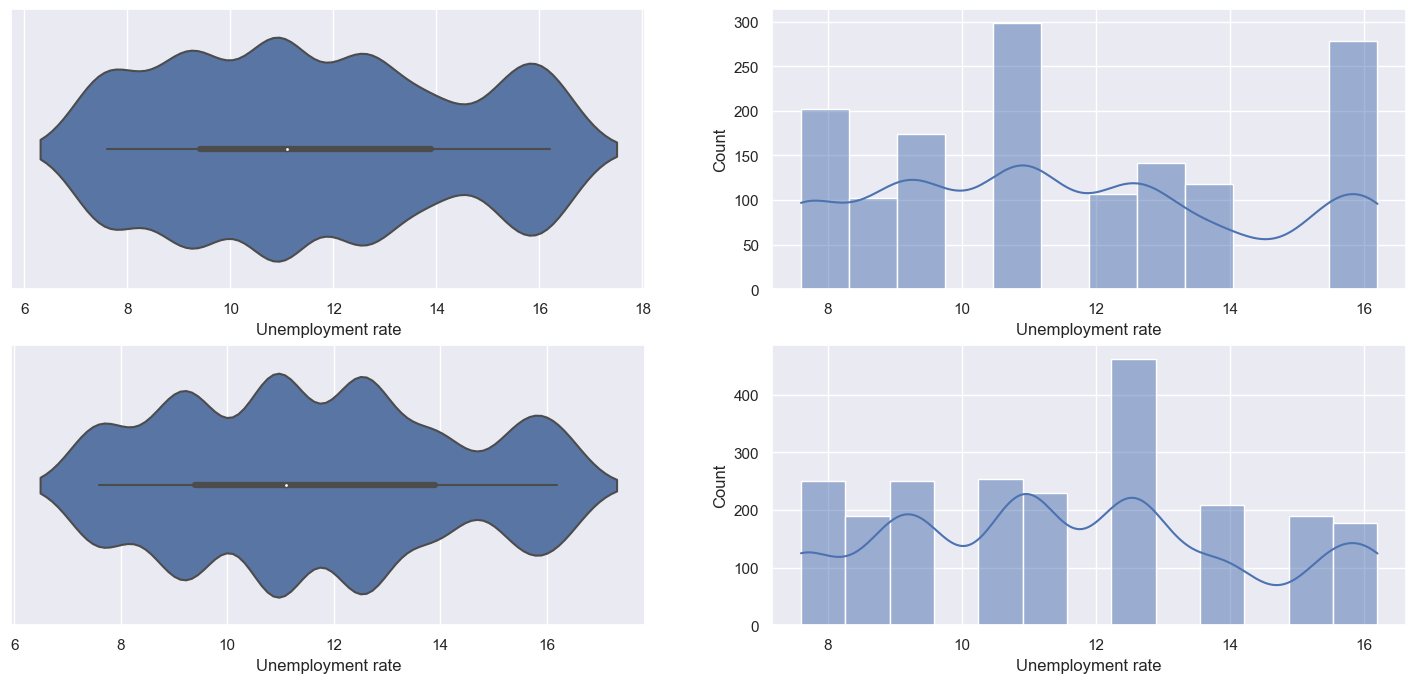

In [208]:
do_numeric_plot_compare(df_macro_dropout,df_macro_graduate,"Unemployment rate")

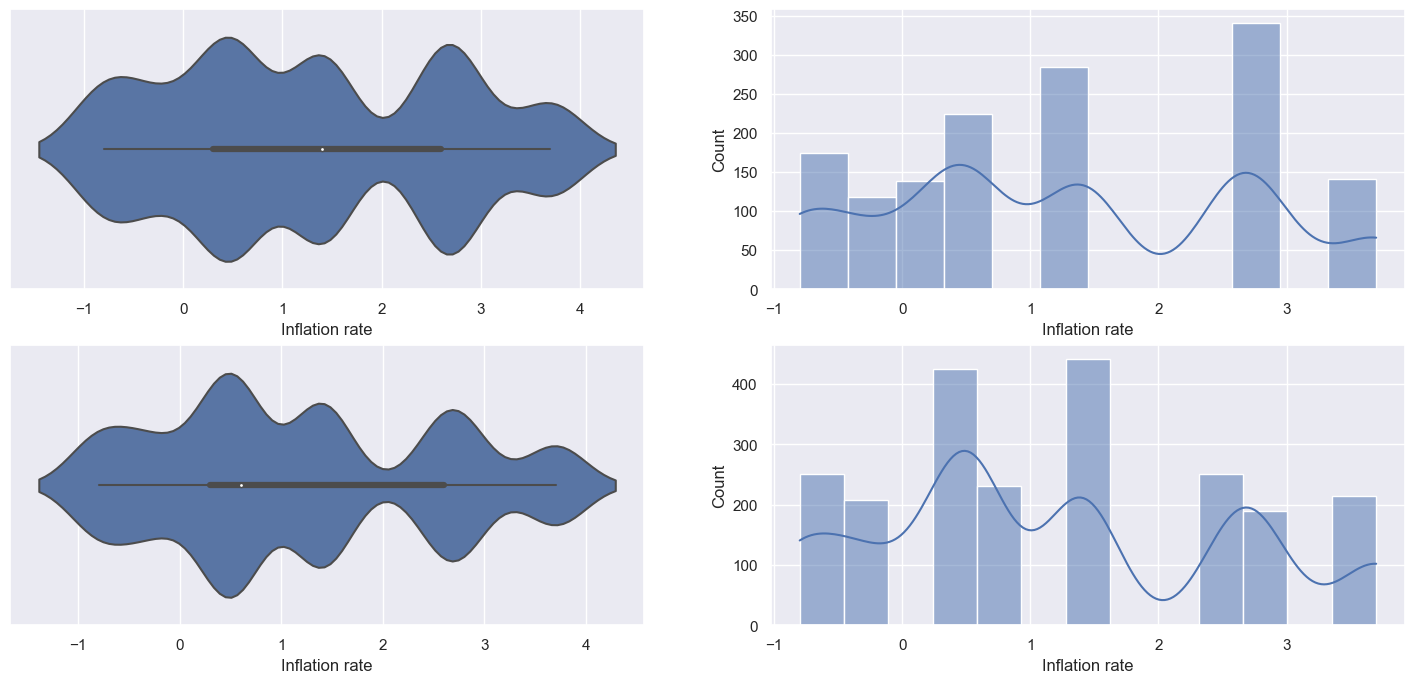

In [209]:
do_numeric_plot_compare(df_macro_dropout,df_macro_graduate, "Inflation rate")

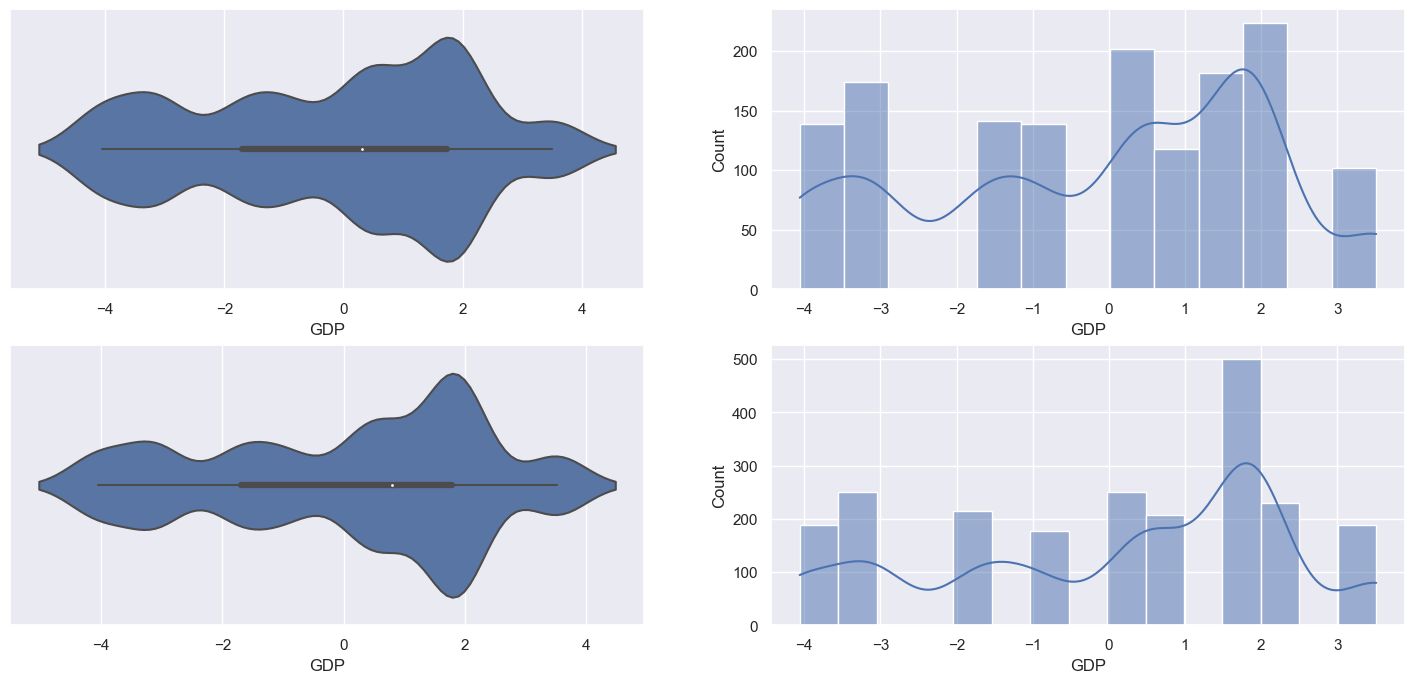

In [210]:
do_numeric_plot_compare(df_macro_dropout,df_macro_graduate, "GDP")

No particular trend observed in macroeconomics.

<AxesSubplot: >

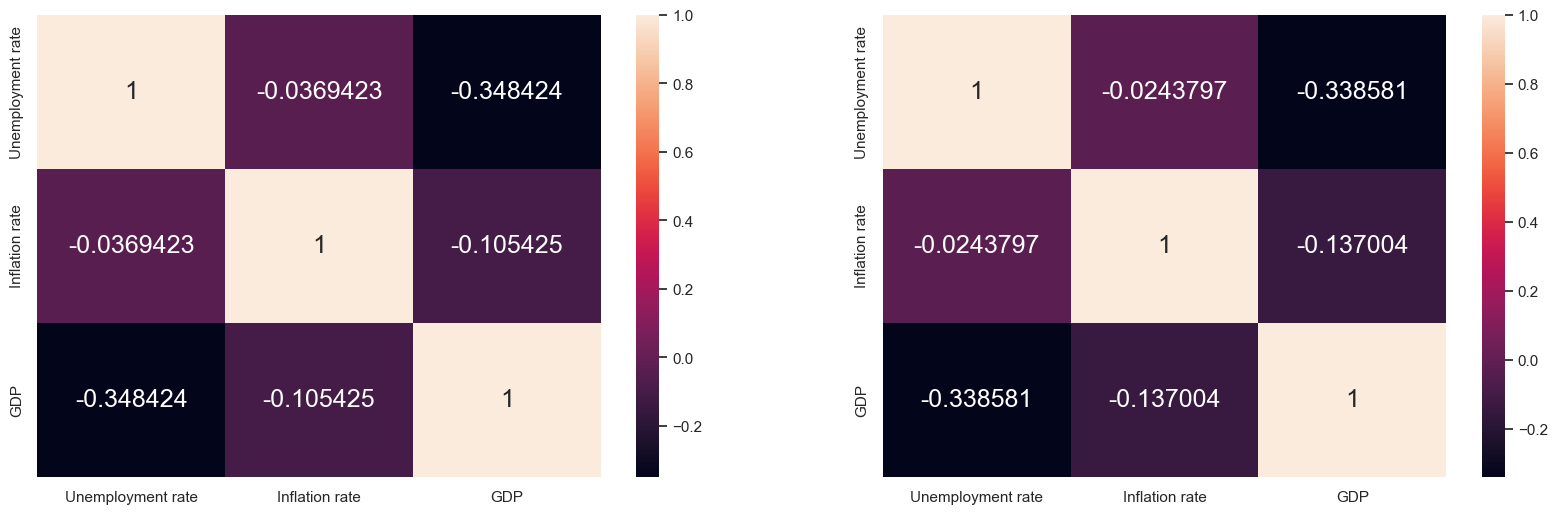

In [215]:
f,axes = plt.subplots(1,2,figsize=(20,6))
sb.heatmap(df_macro_dropout.corr(), annot = True, fmt = 'g', annot_kws = {"size": 18}, ax=axes[0])
sb.heatmap(df_macro_graduate.corr(), annot = True, fmt = 'g', annot_kws = {"size": 18}, ax=axes[1])

GDP slightly correlated to unemployment rate, but both heatmaps are similar and hence they do not act as differentiator for Target.

---

### Explore Academic data